<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Data Mining</b></center>
<center><b><h1>Lab - 7 (Part 2)</b></center>   
<pre>
<b><h3>Dhruvi Valera</b>  
<b><h3>23010101290</b>  



### Step 1: Load the Dataset
Load the `Tdata.csv` file and display the first few rows.

In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('Tdata.csv')
data

,Transaction,bread,butter,coffee,eggs,jam,milk
0,T1,1,1,0,0,0,1
1,T2,1,1,0,0,1,0
2,T3,1,0,0,1,0,1
3,T4,1,1,0,0,0,1
4,T5,1,0,1,0,0,0
5,T6,0,0,1,1,1,0


### Step 2: Drop the 'Transaction' Column
We're only interested in the items (not the transaction IDs).

In [7]:
df_items = data.drop(columns = ['Transaction'])
df_items.head()

,bread,butter,coffee,eggs,jam,milk
0,1,1,0,0,0,1
1,1,1,0,0,1,0
2,1,0,0,1,0,1
3,1,1,0,0,0,1
4,1,0,1,0,0,0


### Step 3: Count Single Items
See how many transactions include each item.

In [35]:
df_items.sum()

bread     5
butter    3
coffee    2
eggs      2
jam       2
milk      3
dtype: int64

### Step 4: Define Apriori Function
This function finds frequent itemsets of size 1, 2, and 3 with minimum support.

In [103]:
from itertools import combinations

def find_freq_items(df , min_support):
    n = len(df)
    result = []

    for k in [1 , 2 , 3]:
        for items in combinations(df.columns , k):
            mask = df[list(items)].all(axis=1)
            support  = mask.sum() / n
            if support >= min_support:
                result.append((frozenset(items) , round(support , 2)))
                
    return result

### Step 5: Run Apriori
Set `min_support = 0.6` and display the frequent itemsets.

In [110]:
frequent_items = find_freq_items(df_items , 0.6) 

In [112]:
for itemset,support in frequent_items:
    print(f"{set(itemset)} -> support : {support}")

{'bread'} -> support : 0.83


### 3Step 6 Display as a DataFrame

In [114]:
result_df = pd.DataFrame(frequent_items , columns=['Itemset' , 'Support'])
result_df

,Itemset,Support
0,(bread),0.83


# Orange Tool : - >Generate Same Frequent Patterns in Orange tools

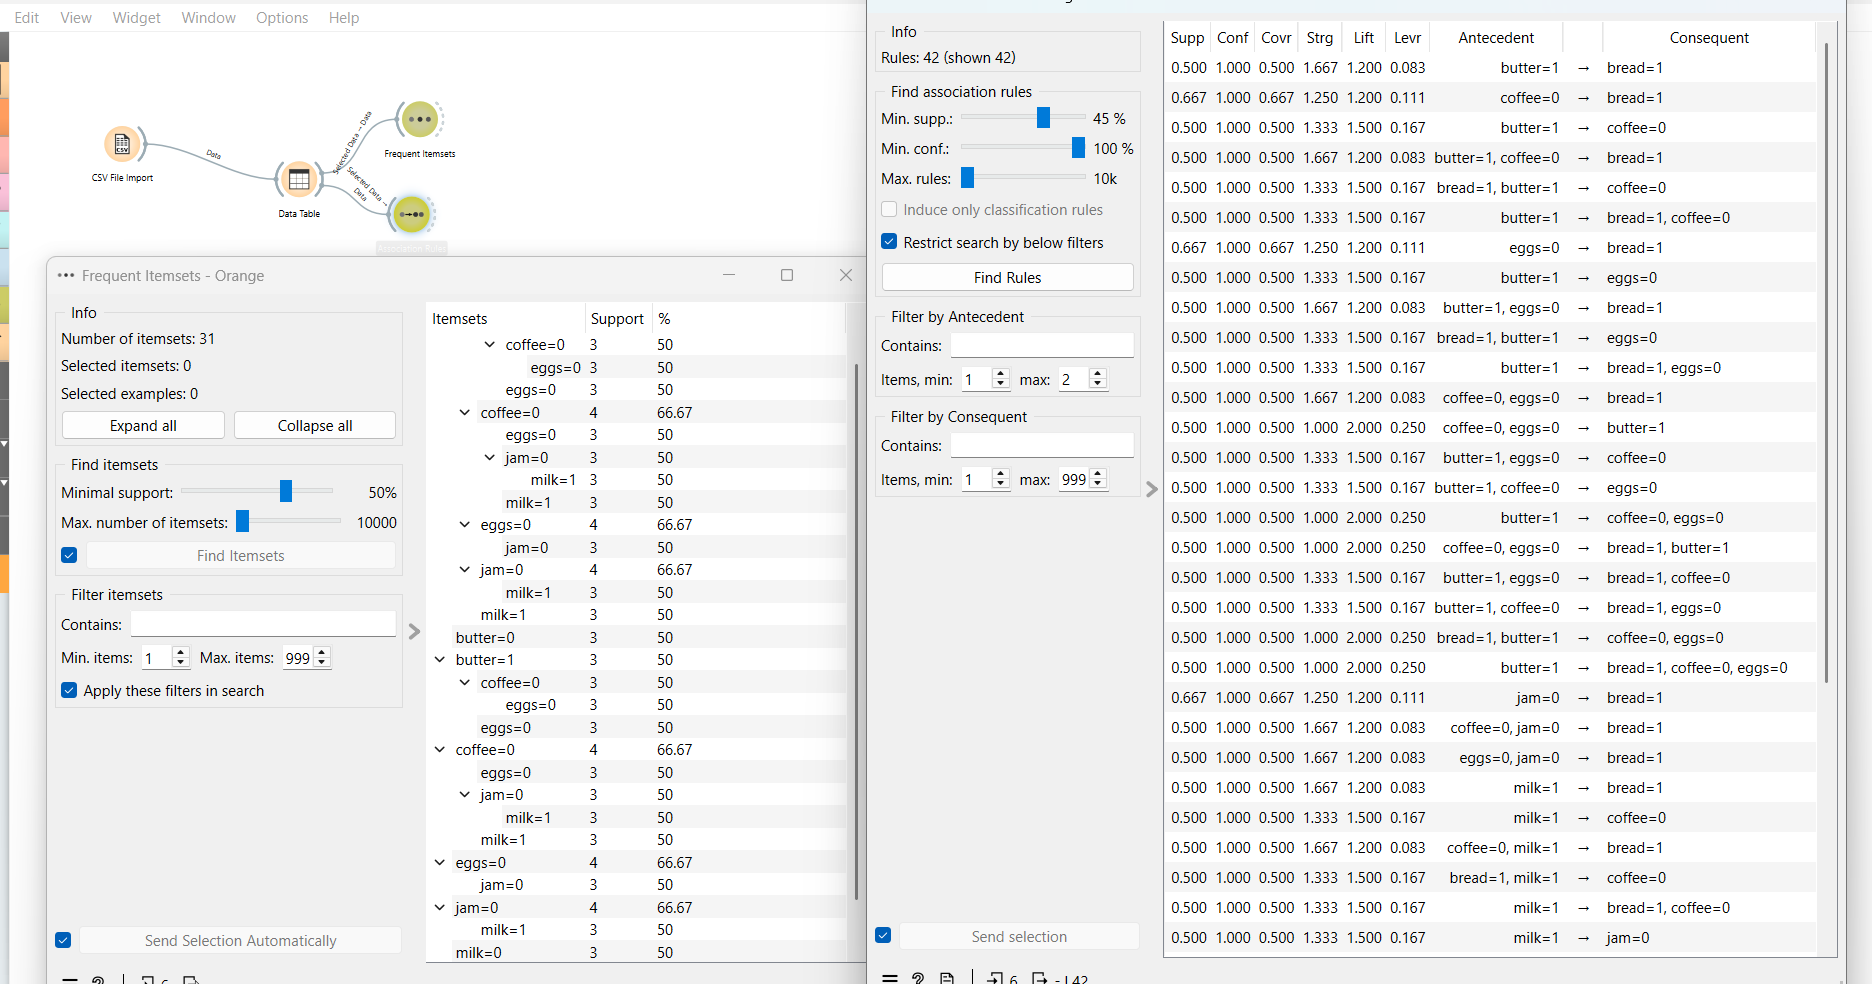

# Extra : - >  Define Apriori Function without itertools